# First pass analysis of line/loop data




## Try to predict whether a probe trial will be correct or not



The question we have to ask is what are they struggling to do right now? In the best case scenario, it is random, we would want these regressors 


### The full way of doing it

This is a Bernoulli regression problem (I think this is an easier way to think about it than a binomial). Build a model with the following regressors. (Do you want an animal performance regressor?)

<ol>
    <li> Source x target (too much??) </li>
    <li> Source to target distance </li>
    <li> Whether this transition exists in both graphs </li>
    <li> The task number that this is on </li>
    <li> Whether this is a line or a loop </li>
    <li> Marginal animal performance on day (?) </li>
    <li> Transition from that node on other graph </li>
    <li> Training day </li>
    <li> Session number </li>
    <li> Number of rewards already received (this could be interesting, could go both ways) </li>
    <li> Is to a reward or not? </li>
</ol>

<b> I think we want to fit this model to each day and see basically all regressors shrinking. </b>


### What is the simple thing to look at?

Ideally would want to look at whether there are some transitions that they are great at and some that they are shit at. The problem is that there is not enough data. Thats why the above approach is nice.


Plot the cumulative fraction of transitions where performance is below chance.

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn
import scipy.stats as stt
from statsmodels.stats import proportion
seaborn.set(font_scale=1.5,style='ticks')
import os
import re
import sys
import itertools
import networkx as nx
sys.path.append("/Users/Yves/Documents/Code/structural_knowledge/packages/")
sys.path.append("/Users/Yves/Documents/Code/")
seaborn.set(font_scale=1.5,style='ticks',rc={'axes.edgecolor': 'k',
                                             'axes.linewidth': 2,
                                             #'xtick.major.size': 6,
                                             'axes.labelcolor':'k',
                                             'xtick.major.width': 2,
                                             'ytick.major.width': 2,
                                             'xtick.major.pad': 5.5,
                                             'ytick.major.pad': 5.5,
                                             'axes.labelsize': 18
                                            })

clrs = seaborn.color_palette()

In [119]:
sys.path.append(r"C:\Users\yweissenberger\Documents\code\line_loop-master")
sys.path.append(r"C:\Users\yweissenberger\Documents\code\line_loop-master\packages")


import mouse_poker as mpk
#import yutils

# Defined functions 

In [120]:
poke_pos = [  [149,0],
         [68,19],[231,19],
       [0,62],[149,62],[298,62],
         [68,105],[231,105],
              [149,124]]

In [138]:
def get_empty_transition_dict(n_nodes=9):
    tmp1 = [str(i[1])+str(i[-2]) for i in list(itertools.combinations(range(n_nodes+1),2))]
    tmp1.extend([i[::-1] for i in tmp1])
    res_dct = {}
    for i in tmp1:
        res_dct[i] = []
    return res_dct

# Actual code to run stuff 

In [177]:
#ROOT = "/Users/yves/Documents/behavior_data/line_loop_cohort_1/"
#ROOT = "/Users/yves/Documents/behavior_data/line_loop_cohort_2/"
#ROOT = "/Users/yves/Documents/behavior_data/line_loop_cohort_3/"
ROOT = '/Users/yweissenberger/Documents/pycontrol_newest_10_02_21/data/line_loop_batch_4_2graphs/'

bb  = mpk.load.create_base_df(ROOT,rerun=True,dirpath=1)
bb = mpk.load.load_df(ROOT)

'456674_3'-2021-02-19-125736.txt
'456674_3'-2021-02-19-130040.txt
'456674_3'-2021-02-19-140311.txt
'456674_3'-2021-02-19-140403.txt
'456674_3'-2021-02-19-142546.txt
'456674_3'-2021-02-19-142738.txt
'456674_3'-2021-02-19-142829.txt
'456674_3'-2021-02-19-143404.txt
'456674_3'-2021-02-19-144555.txt
'456674_3'-2021-02-19-144700.txt
'456674_3'-2021-02-22-102622.txt
'456674_3'-2021-02-23-115427.txt
'456674_3'-2021-02-25-123514.txt
'456674_3'-2021-02-25-124006.txt
'456674_3'-2021-02-25-125224.txt
'456674_3'-2021-02-25-125303.txt
'456674_3'-2021-02-26-134653.txt
'456674_3'-2021-02-26-135204.txt
'456674_3'-2021-02-26-135530.txt
'456674_3'-2021-02-26-135626.txt
'456674_3'-2021-03-01-125208.txt
'456674_3'-2021-03-01-130307.txt
'456674_3'-2021-03-01-130420.txt
'456674_3'-2021-03-02-115424.txt
'456674_3'-2021-03-03-121418.txt
'456674_3'-2021-03-04-123204.txt
'456674_3'-2021-03-04-125433.txt
'456674_33'-2021-02-19-140311.txt
'456674_33'-2021-02-19-140403.txt
'456674_33'-2021-02-19-142546.txt
'456674

In [178]:
good_df = bb.loc[bb['nRews']>20]

In [179]:
allR_dict_1 = dict([(i+'_1',get_empty_transition_dict()) for i in np.unique(good_df['mouse_ID']).tolist()])
allR_dict_2 = dict([(i+'_2',get_empty_transition_dict()) for i in np.unique(good_df['mouse_ID']).tolist()])
allR_dict = {**allR_dict_1, **allR_dict_2}


In [180]:
THRESHT = 20.

allRes = []
frac_not_yet = []
frac_not_yet2 = []


tdict = get_empty_transition_dict()


allR_dict_1 = dict([(i+'_1',get_empty_transition_dict()) for i in np.unique(good_df['mouse_ID']).tolist()])
allR_dict_2 = dict([(i+'_2',get_empty_transition_dict()) for i in np.unique(good_df['mouse_ID']).tolist()])
allR_dict = {**allR_dict_1, **allR_dict_2}


allR_dict_1 = dict([(i+'_1',get_empty_transition_dict()) for i in np.unique(good_df['mouse_ID']).tolist()])
allR_dict_2 = dict([(i+'_2',get_empty_transition_dict()) for i in np.unique(good_df['mouse_ID']).tolist()])
allR_dict_lat = {**allR_dict_1, **allR_dict_2}

all_summary_dict= []
for date in np.unique(good_df['date'])[-5:]:
    sys.stdout.write("\r{}".format(date))
    day_df = good_df.loc[good_df['date']==date]
    if True:#'forced' in day_df['task_name'].values[0]:
        

        bin_ms = 1
        bin_mult = 1000/bin_ms


        poked_in_probe = []
        poked_correct = []
        poked_correctR = []
        poked_correctNR = []

        res = {'pkA':[],
               'pkR':[],
               'pkNR':[],
               'pkA2':[],
               'pkR2':[],
               'pkNR2':[],
               'pkFrac': [],
               'pkFR': [],
               'graph_type':[],
               'graph_id':[],
               'task_nr': [],
               'subject_id': []}


        try:
            for fpath in day_df['filepath'].values:
                
                f = open(fpath,'r')

                lines = f.readlines()
                dat_dict,events,event_times,nRews,_ = mpk.load.parse_data(lines,None)
                out = mpk.load.get_metadata(lines)
                experiment_name, task_name, subject_id, task_nr, graph,lineloop,date,test,summary_dict = out
                all_summary_dict.append(summary_dict)
                
                
                if 'probe_duration' in summary_dict:
                    window_s = float(summary_dict['probe_duration'])/1000.
                else:
                    window_s  = 1.

                
                res['graph_type'].append(lineloop);res['graph_id'].append(graph);res['task_nr'].append(task_nr)
                res['subject_id'].append(subject_id)

                
                inPokes,inPoke_t,outPoke_t,poke_dur = mpk.proc.get_pokes(events,event_times,bin_mult)

                inPoke_t = inPoke_t[poke_dur>THRESHT]; inPokes = inPokes[poke_dur>THRESHT]
                isProbe = np.array([i[-1] for i in dat_dict['port']])

                poked_in_probe = []
                poked_correct = []
                poked_correctR = []
                poked_correctNR = []

                probe_ixs = np.where(isProbe)[0]
                #print(res['graph_type'])
                if ((lineloop=='line' and task_nr=='1') or task_nr=='2'):
                    print('number of probe trials:{}'.format(len(probe_ixs)))
                    for ix in np.where(isProbe)[0]:
                        t_str = str(dat_dict['port'][ix][0]) + str(dat_dict['port'][ix][1])
                        probeT = int(dat_dict['port'][ix][-2]*bin_mult)

                        prevPk = dat_dict['port'][ix][0]
                        target = dat_dict['port'][ix][1]

                        #these are pokes in window before light comes on
                        ixs = (np.where((inPoke_t>probeT) *
                                       (inPoke_t<(probeT+(window_s*bin_mult))))[0])# *


                        if len(ixs)>0:

                            use2 = [i for i in inPokes[ixs] if i!=prevPk]
                            if len(use2)>0:
                                poked_in_probe.append(1)
                                #if target in inPokes[ixs]:
                                if target==use2[0]:
                                    allR_dict[subject_id+'_'+str(task_nr)][t_str].append(1)
                                    if target in [0,3,5,8]:
                                        poked_correctR.append(1)
                                        tdict[t_str].append(1)
                                    else:
                                        poked_correctNR.append(1)
                                        tdict[t_str].append(1)
                                    poked_correct.append(1)
                                else:
                                    allR_dict[subject_id+'_'+str(task_nr)][t_str].append(0)
                                    if target in [0,3,5,8]:
                                        poked_correctR.append(0)
                                        tdict[t_str].append(0)
                                    else:
                                        poked_correctNR.append(0)
                                        tdict[t_str].append(0)
                                    poked_correct.append(0)

                            else:
                                poked_in_probe.append(0)
                                allR_dict[subject_id+'_'+str(task_nr)][t_str].append(0)
                                poked_correct.append(0)
                                if target in [0,3,5,8]: 
                                    poked_correctR.append(0)
                                else:
                                    poked_correctNR.append(0)




                        else:
                            poked_correct.append(0)
                            if target in [0,3,5,8]:
                                poked_correctR.append(0)
                            else:
                                poked_correctNR.append(0)

                            poked_in_probe.append(0)
                            tdict[t_str].append(0)
                            allR_dict[subject_id+'_'+str(task_nr)][t_str].append(0)

                    res['pkA'].append(poked_correct)
                    res['pkR'].append(poked_correctR)
                    res['pkNR'].append(poked_correctNR)
                    res['pkFrac'].append(poked_in_probe)

                    res['pkA2'].append([i for j in res['pkA'] for i in j])
                    res['pkR2'].append([i for j in res['pkR'] for i in j])
                    res['pkNR2'].append([i for j in res['pkNR'] for i in j])
                    res['pkFR'].append([i for j in res['pkFrac'] for i in j])


                    for ii,jj in zip(dat_dict['port'][1:-1],dat_dict['port'][2:]):
                        t_str = str(ii[0]) + str(ii[1])
                        allR_dict_lat[subject_id+'_'+str(task_nr)][t_str].append(jj[2]-ii[2])



            allRes.append(res)
        except ValueError:
            print("\nWARNING FAILURE FOR {}\n".format(fpath))
        
        mu_transs = []
        mu_transs2 = []
        for ijk,k_ in enumerate(allR_dict.keys()):
            for k,v in allR_dict[k_].items():
                #print(k,)
                if len(v)>0:
                    mu_transs.append(stt.binom_test(np.sum(v[-20:]),len(v[-20:]),p=1/9.,alternative='greater')<0.05)
                    mu_transs2.append(len(mu_transs)>50)
        frac_not_yet.append(np.sum(mu_transs))
        frac_not_yet2.append(np.sum(mu_transs2))

2021-02-26T00:00:00.000000000number of probe trials:39
number of probe trials:19
number of probe trials:349
number of probe trials:53
number of probe trials:41
number of probe trials:56
2021-03-01T00:00:00.000000000number of probe trials:86
number of probe trials:331
number of probe trials:16
number of probe trials:97
number of probe trials:156
number of probe trials:154
number of probe trials:55
number of probe trials:47
2021-03-02T00:00:00.000000000number of probe trials:26
number of probe trials:72
number of probe trials:80
number of probe trials:118
number of probe trials:339
number of probe trials:89
number of probe trials:84
number of probe trials:55
2021-03-03T00:00:00.000000000number of probe trials:230
number of probe trials:80
number of probe trials:72
number of probe trials:110
number of probe trials:321
number of probe trials:32
number of probe trials:26
2021-03-04T00:00:00.000000000number of probe trials:160
number of probe trials:115
number of probe trials:82
number of pr

In [181]:
"""#dIx = 
res_new = [[],[],[],[]]

for ix__ in range(10,20):
    for gid_,perf_ in zip(allRes[ix__]['graph_id'],[np.mean(i) for i in allRes[ix__]['pkA']]):
        if gid_=='G1_0':
            res_new[0].append(perf_)
        if gid_ in ('G1_1','G2_0'):
            res_new[1].append(perf_)
        if gid_ in ('G2_1','G3_0','G4_1'):
            res_new[2].append(perf_)
        if gid_ in ('G3_1','G4_0'):
            res_new[3].append(perf_)"""
print(1)

1


In [182]:
ix__ = -3
all_subjects= np.unique(allRes[ix__]['subject_id'] )
res_new = np.zeros([len(all_subjects),2])

for ix in range(len(allRes[ix__]['graph_id'])):
    subject = np.where(all_subjects==allRes[ix__]['subject_id'][ix])[0]
    giD = int(allRes[ix__]['task_nr'][ix]) - 1
    res_new[subject,giD] = [np.mean(i) for i in allRes[ix__]['pkA']][ix]
#res_new = []

In [183]:
all_lats = []
all_fc = []
for subject_id in np.unique(good_df['mouse_ID']):
    for task_nr in range(1,3):
        task_nr = str(task_nr)
        for k,v in allR_dict_lat[subject_id+'_'+task_nr].items():
            if v:
                all_lats.append(np.median([i for i in v[-20:] if i<=2]))

        for k,v in allR_dict[subject_id+'_'+task_nr].items():
            if v:
                all_fc.append(np.mean(v[-20:]))

In [184]:
r,pval = yutils.cc_pval(all_lats,all_fc)

NameError: name 'yutils' is not defined

C:\Users\yweissenberger\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'r' is not defined

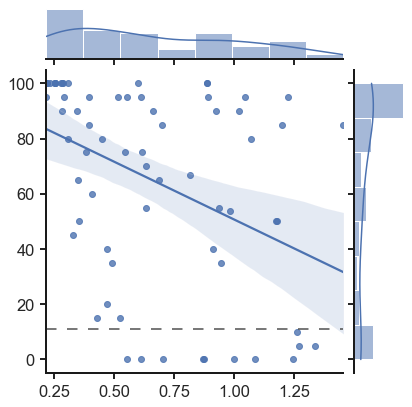

In [185]:
seaborn.jointplot(all_lats,np.array(all_fc)*100,kind='reg')
plt.axhline(y=100/9.,dashes=(7,7),color='.3')
plt.gca().annotate("r = {:.2f} \np<0.0001".format(r),(.5,.8),xycoords='axes fraction')
plt.xlabel("Median transistion duration\nnon-probe trial (s)")
plt.ylabel("Fraction correct \nprobe trial (%)")
plt.ylim(-1,101)
plt.xlim(0.2,2)


In [186]:
#seaborn.distplot(all_fc,kde=0,bins=17)

In [187]:
mu_transs = []
for ijk,k_ in enumerate(allR_dict.keys()):
    for k,v in allR_dict[k_].items():
        #print(k,)
        if len(v)>0:
            #print(len(v))
            v = v[-25:]
            mu_transs.append(stt.binom_test(np.sum(v),len(v),p=1/9.)<0.05)


In [188]:
v

[]

[0.42647059 0.54411765 0.73529412 0.76470588 0.79411765]


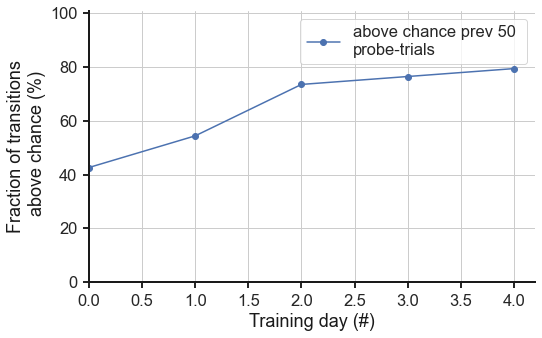

In [189]:
plt.figure(figsize=(8,5))

normC = len(mu_transs)#450 if 'cohort_1' in ROOT else 158

plt.plot(100*np.array(frac_not_yet)/normC,marker='o',label='above chance prev 50 \nprobe-trials')
ax = plt.gca()
#ax2 = plt.gca().twinx()
#ax.plot(100*np.array(frac_not_yet2)/400.,marker='o',color=clrs[1],label='>50 probe trials')
ax.set_ylabel("Fraction of transitions\n above chance (%)")
ax.set_xlabel("Training day (#)")
plt.xlim(0)
plt.ylim(0,101)
plt.legend()
print(np.array(frac_not_yet[-5:])/normC)
plt.grid()
seaborn.despine(top=True)

[0.42647059 0.54411765 0.73529412 0.76470588 0.79411765]


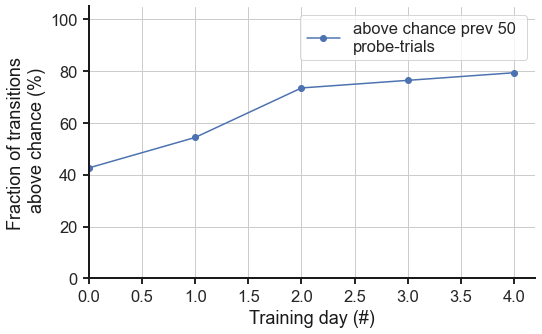

In [190]:
plt.figure(figsize=(8,5))

normC = len(mu_transs)#450 if 'cohort_1' in ROOT else 158

plt.plot(100*np.array(frac_not_yet)/normC,marker='o',label='above chance prev 50 \nprobe-trials')
ax = plt.gca()
#ax2 = plt.gca().twinx()
#ax.plot(100*np.array(frac_not_yet2)/400.,marker='o',color=clrs[1],label='>50 probe trials')
ax.set_ylabel("Fraction of transitions\n above chance (%)")
ax.set_xlabel("Training day (#)")
plt.xlim(0)
plt.ylim(0,105)
plt.legend()
print(np.array(frac_not_yet[-5:])/normC)
plt.grid()
seaborn.despine(top=True)

In [191]:
mu_transs = []
for ijk,k_ in enumerate(allR_dict.keys()):

    for k,v in allR_dict[k_].items():
        #print(k,)
        if len(v)>0:
            mu_transs.append(np.mean(v)>.2)


In [192]:
len(mu_transs)

68

In [193]:
def probe_trial_outcomes(dat_dict,bin_mult=1000,window_s=1.,t_dict=None):
    """ In this notebook track the outcome of probe trials"""
    
    if t_dict is None: tdict = get_empty_transition_dict()

    
    probe_ixs = np.where(np.array([i[-1] for i in dat_dict['port']]))[0]
    
    
    for ix in probe_ixs:
        
        
        probeT = int(dat_dict['port'][ix][-2]*bin_mult) #timestamp of probe trial

        prevPk = dat_dict['port'][ix][0]; target = dat_dict['port'][ix][1]
        
        t_str = str(prevPk) + str(target)


        #these are pokes in window before light comes on
        inprobe_ixs = np.where((inPoke_t>probeT) *(inPoke_t<(probeT+(window_s*bin_mult))))[0]# *

        
        if len(inprobe_ixs)>0:

            #use2 = [i for i in inPokes[ixs] if i!=prevPk]
            use2 = inPokes[inprobe_ixs]
            if len(use2)>0:

                if target in inPokes[inprobe_ixs]:
                    if target in [0,3,5,8]:
                        poked_correctR.append(1)
                        tdict[t_str].append(1)
                        allR_dict[subject_id][t_str].append(1)
                    else:
                        poked_correctNR.append(1)
                        tdict[t_str].append(1)
                        allR_dict[subject_id][t_str].append(1)
                    poked_correct.append(1)
                else:
                    if target in [0,3,5,8]:
                        poked_correctR.append(0)
                        tdict[t_str].append(0)
                        allR_dict[subject_id][t_str].append(0)
                    else:
                        poked_correctNR.append(0)
                        tdict[t_str].append(0)
                        allR_dict[subject_id][t_str].append(0)
                    poked_correct.append(0)

            else:
                allR_dict[subject_id][t_str].append(0)

            poked_in_probe.append(1)
        else:
            poked_correct.append(0)
            if target in [0,3,5,8]:
                poked_correctR.append(0)
            else:
                poked_correctNR.append(0)

            poked_in_probe.append(0)
            #tdict[t_str].append(0)
            allR_dict[subject_id][t_str].append(0)
            
    return poked_correctR, poked_correctNR, t_dict

In [194]:
fC = []
regs2 = []
mouse_list = np.unique([i[:-2] for i in list(allR_dict.keys())]).tolist()
for ijk,k_ in enumerate(allR_dict.keys()):

    for k,v in allR_dict[k_].items():
        if len(v)>0:

            v = np.array(v)
            
            t1_,t2_ = int(k[0]),int(k[1])
            t1 = np.zeros(9); t1[t1_] = 1
            t2 = np.zeros(9); t2[t2_] = 1
            mReg = np.zeros(18); mReg[mouse_list.index(k_[:-2])-1] = 1
            dst = np.array(poke_pos[t1_])-np.array(poke_pos[t2_])
            isR = [t1_ in [0,3,5,8]]
            #isBelow = [dst[0]<0]
            absDst = np.abs(dst)
            regs2.append(np.hstack([t1,t2,absDst,isR,mReg,[k_[-1]==1]]))
            fC.append([np.sum(v[-50:]),np.sum(v[-50:]==0)])

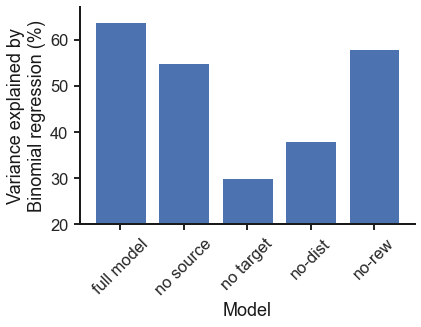

In [195]:
plt.bar(range(5), [64,55,30,38,58])
plt.ylabel("Variance explained by\nBinomial regression (%)")
plt.xticks(range(5),['full model','no source','no target','no-dist','no-rew'],rotation=45)
plt.xlabel("Model")
plt.ylim(20)
seaborn.despine()

In [196]:
fc = []
regs = []
for kk,i in enumerate(fC):
    if np.sum(i)>10:
        fc.append(i)
        regs.append(regs2[kk])

In [197]:
DM = np.vstack([np.hstack(i) for i in regs])
fc = np.array(fc)

In [198]:
import statsmodels.api as sm

glm_binom = sm.GLM(fc,DM, family=sm.families.Binomial())

In [199]:
res = glm_binom.fit()

In [200]:
print('Fraction of explained deviance: {:.2f}%'.format(1-res.llf/res.llnull))

Fraction of explained deviance: 0.64%


In [201]:
print('Fraction of explained deviance: {:.2f}%'.format(1-res.llf/res.llnull))

Fraction of explained deviance: 0.64%


Text(0, 0.5, 'Mean parameter weight')

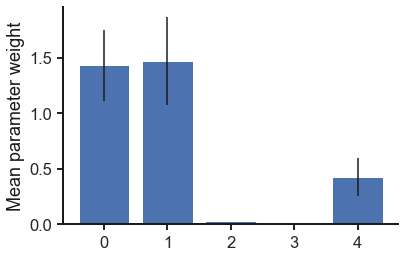

In [202]:
y = [np.mean(np.abs(res.params[:9])),
   np.mean(np.abs(res.params[9:18])),
   np.abs(res.params[18]),
   np.abs(res.params[19]),
   np.mean(np.abs(res.params[19:]))]


yerr = [stt.sem(np.abs(res.params[:9])),
                   stt.sem(np.abs(res.params[9:18])),
                   0,
                   0,
                   stt.sem(np.abs(res.params[19:]))]
plt.bar(range(5),y,yerr=yerr)
#plt.xticks(range(5),['source','target','distance',''],rotation=45)
seaborn.despine()
plt.ylabel("Mean parameter weight")
#plt.

In [203]:
[stt.sem(np.abs(res.params[:9])),
                   stt.sem(np.abs(res.params[9:18])),
                   np.abs(res.params[18]),
                   np.abs(res.params[19]),
                   stt.sem(np.abs(res.params[19:]))]

[0.32093857272433235,
 0.3981661150255133,
 0.02609556113071701,
 0.0003415451641498358,
 0.1727716087688393]

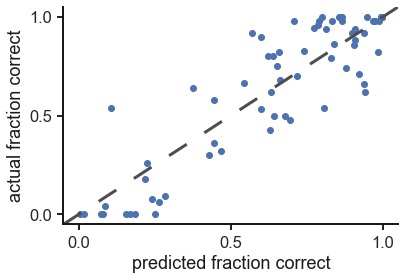

In [204]:
fc_plot = fc[:,0]/np.sum(fc,axis=1)
e = 0.05
plt.scatter(res.mu,fc_plot)
plt.plot([0-e,1+e],[0-e,1+e],color='.3',linewidth=3,dashes=(7,7))
plt.xlim(0-e,1+e)
plt.ylim(0-e,1+e)
seaborn.despine()
plt.xlabel('predicted fraction correct')
plt.ylabel('actual fraction correct')
plt.locator_params(nbins=3)

C:\Users\yweissenberger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2.0)

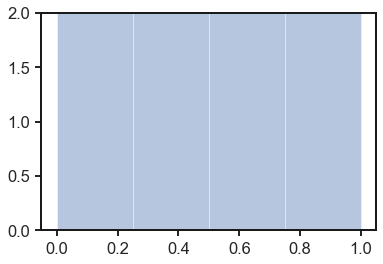

In [205]:
seaborn.distplot(fc[:,0]/np.sum(fc,axis=1),kde=0)
plt.ylim(0,2)

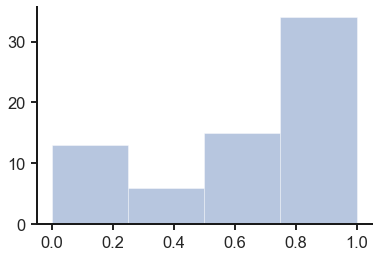

In [206]:
seaborn.distplot(fc[:,0]/np.sum(fc,axis=1),kde=0)
seaborn.despine()

In [207]:
np.mean(fc[:,0]/np.sum(fc,axis=1))

0.6372825600133183

In [208]:
[[np.mean(i[-10:]),j,len(i)] for j,i in allR_dict['459849_None_2'].items() if len(i)>5]

[]

In [209]:
    mu_transs = [np.mean(i) for i in allR_dict['459849_3_2'].values() if len(i)>0]


In [210]:
from statsmodels.stats.proportion import proportion_confint

In [211]:
stt.binom_test(15,100,p=0.09)

0.051396053885998313

In [212]:
pairs = []
ctr = 0 
for i,j in zip([i for i in dat_dict['port']],[i for i in dat_dict['state']]):
    #if
    ctr += 1
    if np.abs(i[2] - j[2])<.05:
        if [i[0],j[0]] not in [i[:2] for i in pairs]:
            pairs.append([i[0],j[0]])

C:\Users\yweissenberger\anaconda3\lib\site-packages\seaborn\distributions.py:2589: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\yweissenberger\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


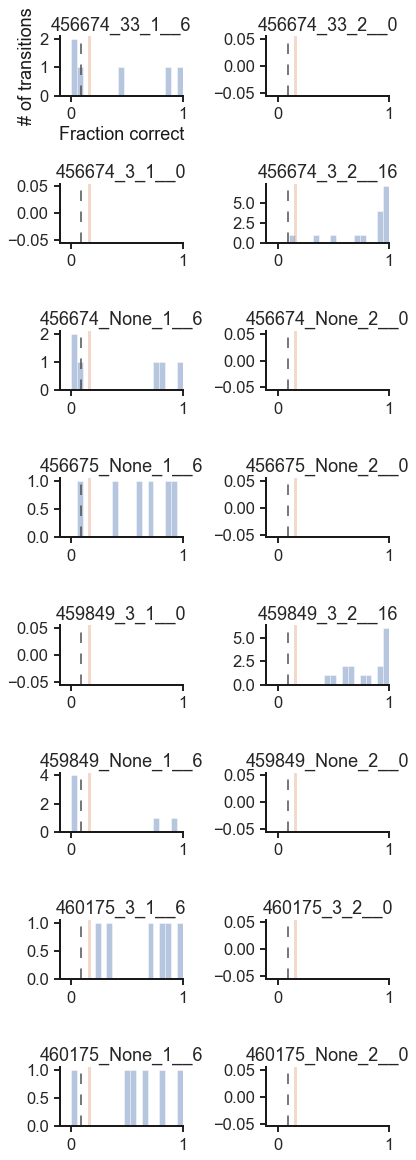

In [213]:
plt.figure(figsize=(6,18))
iii = 0
for ijk,k in enumerate(sorted(allR_dict.keys())):
    if True:#(('None' not in k) and ('33' not in k) and ('3' not in k)) or ('850_3' in k) or ('850_None' in k) or ('30' in k):
        plt.subplot(9,2,iii+1)
        plt.title(k + '__' +str(len([np.mean(i[-5:]) for i in allR_dict[k].values() if len(i)>0])))

        mu_transs = [np.mean(i[-40:]) for i in allR_dict[k].values() if len(i)>0]
        #for k,v in allR_dict[k].items():
        #    #print(k,)
        #    if len(v)>0:
        #        mu_transs.append(np.mean(v[-10:]))

        #print(len(mu_transs))
        seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=20))
        plt.axvline(x=0.09,color='.3',dashes=(7,7))
        plt.axvline(x=0.16,color=clrs[1],alpha=.3,linewidth=3)

        if ijk==0:
            plt.ylabel("# of transitions")
            plt.xlabel("Fraction correct")
        #plt.ylim(0,6)
        plt.xlim(-.1,1)
        plt.locator_params('y',nbins=3)
        iii += 1
plt.tight_layout()
seaborn.despine( )

C:\Users\yweissenberger\anaconda3\lib\site-packages\seaborn\distributions.py:2589: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\yweissenberger\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


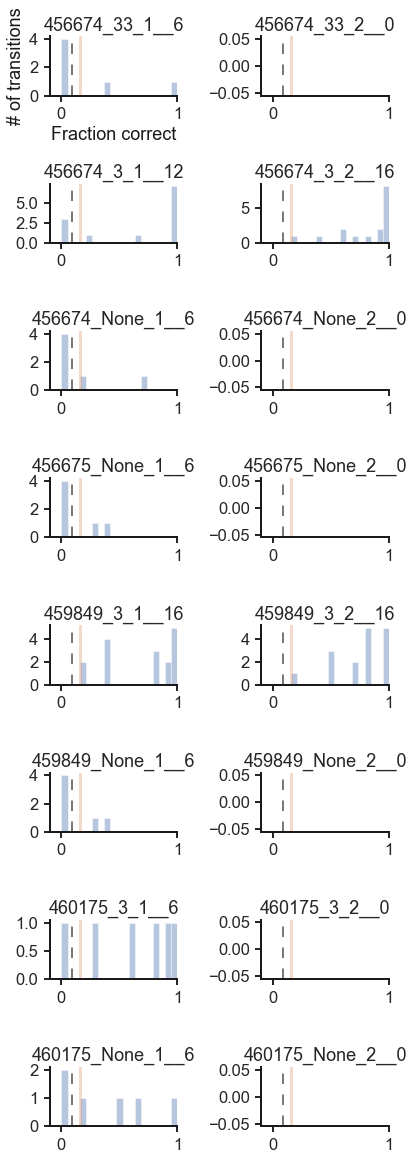

In [531]:
plt.figure(figsize=(6,18))
iii = 0
for ijk,k in enumerate(sorted(allR_dict.keys())):
    if True:#(('None' not in k) and ('33' not in k) and ('3' not in k)) or ('850_3' in k) or ('850_None' in k) or ('30' in k):
        plt.subplot(9,2,iii+1)
        plt.title(k + '__' +str(len([np.mean(i[-5:]) for i in allR_dict[k].values() if len(i)>0])))

        mu_transs = [np.mean(i[-10:]) for i in allR_dict[k].values() if len(i)>0]
        #for k,v in allR_dict[k].items():
        #    #print(k,)
        #    if len(v)>0:
        #        mu_transs.append(np.mean(v[-10:]))

        #print(len(mu_transs))
        seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=20))
        plt.axvline(x=0.09,color='.3',dashes=(7,7))
        plt.axvline(x=0.16,color=clrs[1],alpha=.3,linewidth=3)

        if ijk==0:
            plt.ylabel("# of transitions")
            plt.xlabel("Fraction correct")
        #plt.ylim(0,6)
        plt.xlim(-.1,1)
        plt.locator_params('y',nbins=3)
        iii += 1
plt.tight_layout()
seaborn.despine( )

In [353]:
mu_transs

[]

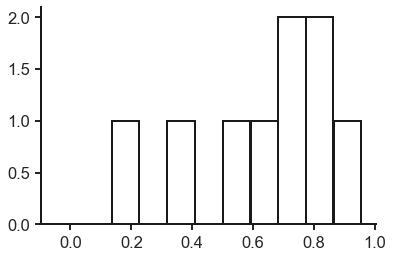

In [79]:
y,bins = np.histogram(mu_transs,np.linspace(0,1,num=12))
plt.bar(bins[:-1],y,width=.09,facecolor='w',edgecolor='k',linewidth=2)
seaborn.despine()

In [180]:
bins

array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
       0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
       0.90909091, 1.        ])

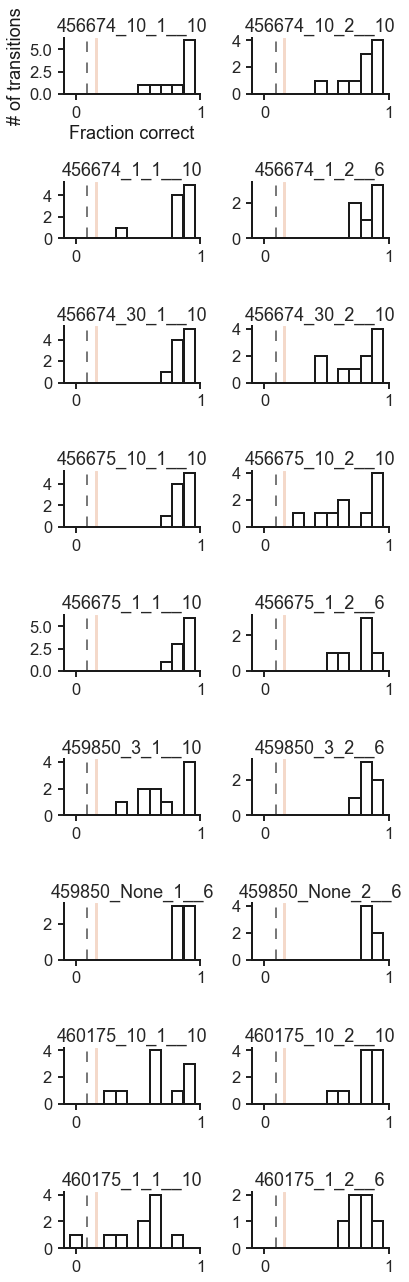

In [181]:
plt.figure(figsize=(6,18))
iii = 0
for ijk,k in enumerate(sorted(allR_dict.keys())):
    if (('None' not in k) and ('33' not in k) and ('3' not in k)) or ('850_3' in k) or ('850_None' in k) or ('30' in k):
        plt.subplot(9,2,iii+1)
        plt.title(k + '__' +str(len([np.mean(i[-5:]) for i in allR_dict[k].values() if len(i)>0])))

        mu_transs = [np.mean(i[-50:]) for i in allR_dict[k].values() if len(i)>0]
        #for k,v in allR_dict[k].items():
        #    #print(k,)
        #    if len(v)>0:
        #        mu_transs.append(np.mean(v[-10:]))

        #print(len(mu_transs))
        #seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=20))
        y,bins = np.histogram(mu_transs,np.linspace(0,1,num=12))
        plt.bar(bins[:-1],y,width=.09,facecolor='w',edgecolor='k',linewidth=2)
        seaborn.despine()
        plt.axvline(x=0.09,color='.3',dashes=(7,7))
        plt.axvline(x=0.16,color=clrs[1],alpha=.3,linewidth=3)

        if ijk==0:
            plt.ylabel("# of transitions")
            plt.xlabel("Fraction correct")
        #plt.ylim(0,12)
        plt.xlim(-.1,1)
        plt.locator_params('y',nbins=3)
        iii += 1
plt.tight_layout()
seaborn.despine( )

In [182]:
edges = []
for i in mu_transs:
    edges.append([int(i[0][0]),int(i[0][1])])
    
G0 = nx.DiGraph()
G0.add_nodes_from(range(9),pos=np.array([1,-1])*poke_pos)
nx.draw(G0,pos=np.array([1,-1])*poke_pos,alpha=.2)
G = nx.DiGraph()
G.add_edges_from([i for i in edges if None not in i])
nx.draw(G,
    pos=np.array([1,-1])*poke_pos,)
#drawn.append(animal+ '__' + task_nr)


IndexError: invalid index to scalar variable.

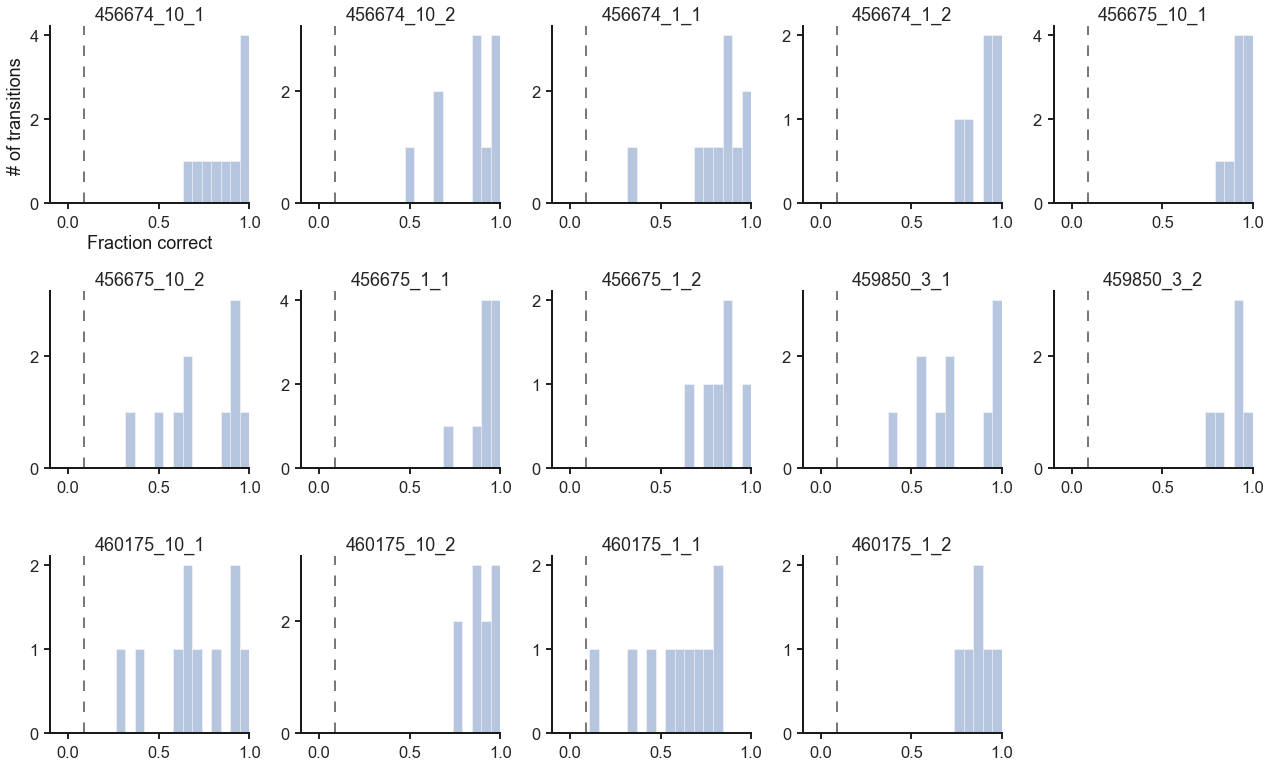

In [183]:
plt.figure(figsize=(18,18))
iii = 0
for ijk,k in enumerate(sorted(allR_dict.keys())):
    if (('None' not in k) and ('33' not in k) and ('3' not in k)) or ('850_3' in k):
        plt.subplot(5,5,iii+1)
        plt.title(k)

        mu_transs = [np.mean(i) for i in allR_dict[k].values() if len(i)>0]
        #for k,v in allR_dict[k].items():
        #    #print(k,)
        #    if len(v)>0:
        #        mu_transs.append(np.mean(v[-10:]))

        #print(len(mu_transs))
        seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=20))
        plt.axvline(x=0.09,color='.3',dashes=(7,7))
        if ijk==0:
            plt.ylabel("# of transitions")
            plt.xlabel("Fraction correct")
        #plt.ylim(0,12)
        plt.xlim(-.1,1)
        plt.locator_params('y',nbins=3)
        iii += 1
plt.tight_layout()
seaborn.despine()

9
9
9
9
9


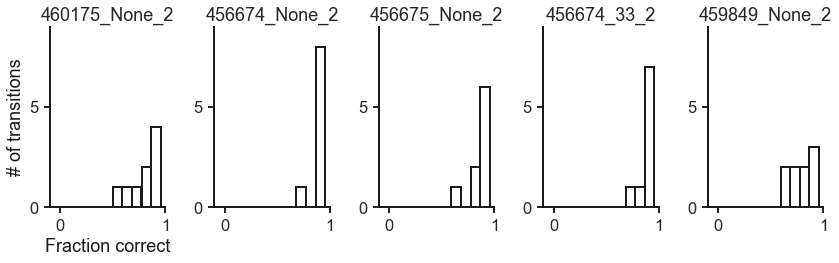

In [184]:
plt.figure(figsize=(12,4))
for ijk,k in enumerate(['460175_None_2','456674_None_2','456675_None_2','456674_33_2','459849_None_2']):
    plt.subplot(1,5,ijk+1)
    plt.title(k)

    mu_transs = [np.mean(i[-50:]) for i in allR_dict[k].values() if len(i)>0]
    print(len(mu_transs))
    #for k,v in allR_dict[k].items():
    #    #print(k,)
    #    if len(v)>0:
    #        mu_transs.append(np.mean(v[-10:]))

    #print(len(mu_transs))
    #seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=10))
    y,bins = np.histogram(mu_transs,np.linspace(0,1,num=12))
    plt.bar(bins[:-1],y,width=.09,facecolor='w',edgecolor='k',linewidth=2)
    seaborn.despine()
    if ijk==0:
        plt.ylabel("# of transitions")
        plt.xlabel("Fraction correct")
    #plt.ylim(0,12)
    plt.xlim(-.1,1)
    plt.ylim(0,9)
    plt.locator_params('y',nbins=3)
plt.tight_layout()
seaborn.despine()

16
16
0
16


/Users/yves/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Users/yves/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


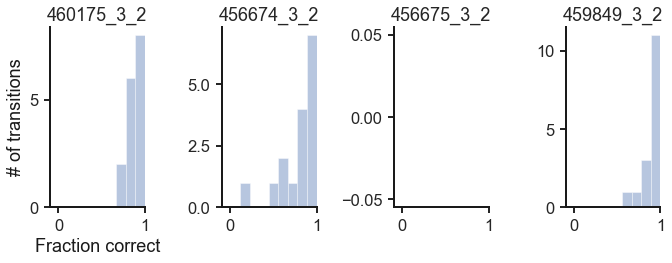

In [185]:
plt.figure(figsize=(12,4))
for ijk,k in enumerate(['460175_3_2','456674_3_2','456675_3_2','459849_3_2']):
    plt.subplot(1,5,ijk+1)
    plt.title(k)

    mu_transs = [np.mean(i[-30:]) for i in allR_dict[k].values() if len(i)>0]
    print(len(mu_transs))
    #for k,v in allR_dict[k].items():
    #    #print(k,)
    #    if len(v)>0:
    #        mu_transs.append(np.mean(v[-10:]))

    #print(len(mu_transs))
    seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=10))
    if ijk==0:
        plt.ylabel("# of transitions")
        plt.xlabel("Fraction correct")
    #plt.ylim(0,12)
    plt.xlim(-.1,1)
    #plt.ylim(0,9)
    plt.locator_params('y',nbins=3)
plt.tight_layout()
seaborn.despine()

In [186]:
'456675_3_2'

'456675_3_2'

16
16
16


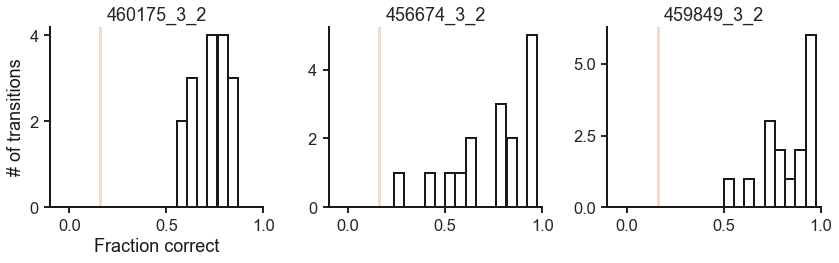

In [189]:
plt.figure(figsize=(12,4))
#for ijk,k in enumerate(['460175_3_2','456674_3_2','456675_3_2','459849_3_2']):
for ijk,k in enumerate(['460175_3_2','456674_3_2','459849_3_2']):

    plt.subplot(1,3,ijk+1)
    plt.title(k)

    mu_transs = [np.mean(i[-200:]) for i in allR_dict[k].values() if len(i)>0]
    print(len(mu_transs))
    #for k,v in allR_dict[k].items():
    #    #print(k,)
    #    if len(v)>0:
    #        mu_transs.append(np.mean(v[-10:]))

    #print(len(mu_transs))
    y,bins = np.histogram(mu_transs,np.linspace(0,1,num=20))
    plt.bar(bins[:-1],y,width=.052,facecolor='w',edgecolor='k',linewidth=2)
    plt.axvline(x=0.16,color=clrs[1],alpha=.3,linewidth=3)

    seaborn.despine()
    if ijk==0:
        plt.ylabel("# of transitions")
        plt.xlabel("Fraction correct")
    #plt.ylim(0,12)
    plt.xlim(-.1,1)
    #plt.ylim(0,9)
    plt.locator_params('y',nbins=3)
plt.tight_layout()
seaborn.despine()

16
16
16
16


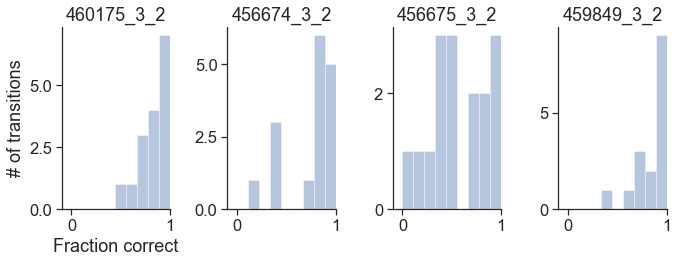

In [3467]:
plt.figure(figsize=(12,4))
for ijk,k in enumerate(['460175_3_2','456674_3_2','456675_3_2','459849_3_2']):
    plt.subplot(1,5,ijk+1)
    plt.title(k)

    mu_transs = [np.mean(i[:]) for i in allR_dict[k].values() if len(i)>0]
    print(len(mu_transs))
    #for k,v in allR_dict[k].items():
    #    #print(k,)
    #    if len(v)>0:
    #        mu_transs.append(np.mean(v[-10:]))

    #print(len(mu_transs))
    seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=10))
    if ijk==0:
        plt.ylabel("# of transitions")
        plt.xlabel("Fraction correct")
    #plt.ylim(0,12)
    plt.xlim(-.1,1)
    #plt.ylim(0,9)
    plt.locator_params('y',nbins=3)
plt.tight_layout()
seaborn.despine()

16
16
16
16


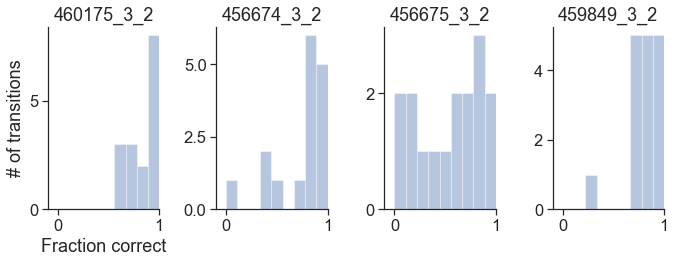

In [3533]:
plt.figure(figsize=(12,4))
for ijk,k in enumerate(['460175_3_2','456674_3_2','456675_3_2','459849_3_2']):
    plt.subplot(1,5,ijk+1)
    plt.title(k)

    mu_transs = [np.mean(i[-200:]) for i in allR_dict[k].values() if len(i)>0]
    print(len(mu_transs))
    #for k,v in allR_dict[k].items():
    #    #print(k,)
    #    if len(v)>0:
    #        mu_transs.append(np.mean(v[-10:]))

    #print(len(mu_transs))
    seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=10))
    if ijk==0:
        plt.ylabel("# of transitions")
        plt.xlabel("Fraction correct")
    #plt.ylim(0,12)
    plt.xlim(-.1,1)
    #plt.ylim(0,9)
    plt.locator_params('y',nbins=3)
plt.tight_layout()
seaborn.despine()

16
16
0
16


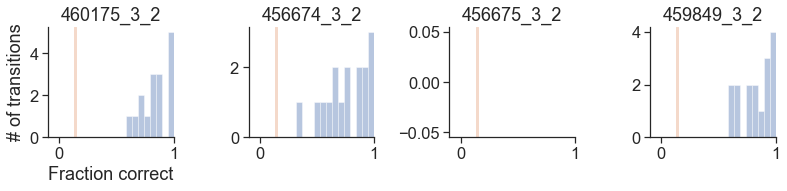

In [317]:
plt.figure(figsize=(14,3))
for ijk,k in enumerate(['460175_3_2','456674_3_2','456675_3_2','459849_3_2']):
    plt.subplot(1,5,ijk+1)
    plt.title(k)

    mu_transs = [np.mean(i[-50:]) for i in allR_dict[k].values() if len(i)>0]
    print(len(mu_transs))
    #for k,v in allR_dict[k].items():
    #    #print(k,)
    #    if len(v)>0:
    #        mu_transs.append(np.mean(v[-10:]))

    #print(len(mu_transs))
    seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=20))
    plt.axvline(x=0.14,color=clrs[1],alpha=.3,linewidth=3)

    if ijk==0:
        plt.ylabel("# of transitions")
        plt.xlabel("Fraction correct")
    #plt.ylim(0,12)
    plt.xlim(-.1,1)
    #plt.ylim(0,9)
    plt.locator_params('y',nbins=3)
plt.tight_layout()
seaborn.despine()

In [2233]:
mu_transs

[0.8125,
 0.6923076923076923,
 0.9166666666666666,
 0.6666666666666666,
 0.9090909090909091,
 0.9523809523809523,
 0.9285714285714286,
 1.0,
 0.8888888888888888]

In [2234]:
[len(i) for i in allR_dict[k].values() if len(i)>0]

[16, 13, 12, 6, 22, 21, 14, 15, 9]

16


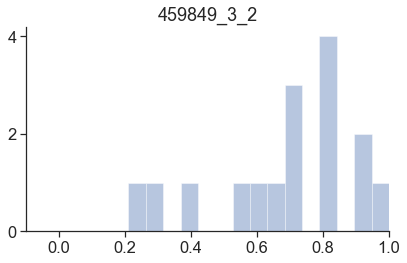

In [2777]:
plt.figure(figsize=(6,4))
k ='459849_3_2'
#for ijk,k in enumerate(['460175_None_2','456674_None_2','456675_None_2','456674_33_2','459849_None_2']):
    #plt.subplot(1,5,ijk+1)
plt.title(k)

mu_transs = [np.mean(i[-50:]) for i in allR_dict[k].values() if len(i)>0]
print(len(mu_transs))
#for k,v in allR_dict[k].items():
#    #print(k,)
#    if len(v)>0:
#        mu_transs.append(np.mean(v[-10:]))

#print(len(mu_transs))
seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=20))
if ijk==0:
    plt.ylabel("# of transitions")
    plt.xlabel("Fraction correct")
#plt.ylim(0,12)
plt.xlim(-.1,1)
#plt.ylim(0,9)
plt.locator_params('y',nbins=3)
plt.tight_layout()
seaborn.despine()

In [1822]:
i

[]

0.9743589743589743
0.9615384615384616
0.75
0.2191780821917808
0.4057971014492754
0.9866666666666667
0.9206349206349206
0.9710144927536232
0.7681159420289855
0.8857142857142857
0.7439024390243902
0.6515151515151515
0.9571428571428572
0.9615384615384616
0.9759036144578314
0.9746835443037974


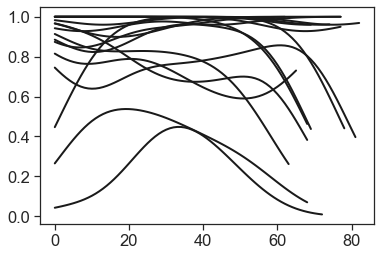

In [1830]:
from scipy.ndimage import gaussian_filter1d
ijk = 0
for i in allR_dict[k].values():
    if len(i)>0:
        #print(i)
        ijk += 1
        oi = i
        print(np.mean(i))
        plt.plot(gaussian_filter1d(np.array(i).astype('float'),10,mode='nearest'),linewidth=2,color='k')

In [1826]:
gaussian_filter1d(oi,5)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

16


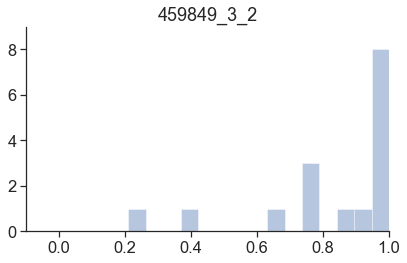

In [1833]:
plt.figure(figsize=(6,4))
k ='459849_3_2'
#for ijk,k in enumerate(['460175_None_2','456674_None_2','456675_None_2','456674_33_2','459849_None_2']):
    #plt.subplot(1,5,ijk+1)
plt.title(k)

mu_transs = [np.mean(i) for i in allR_dict[k].values() if len(i)>0]
print(len(mu_transs))
#for k,v in allR_dict[k].items():
#    #print(k,)
#    if len(v)>0:
#        mu_transs.append(np.mean(v[-10:]))

#print(len(mu_transs))
seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=20))
if ijk==0:
    plt.ylabel("# of transitions")
    plt.xlabel("Fraction correct")
#plt.ylim(0,12)
plt.xlim(-.1,1)
plt.ylim(0,9)
#plt.locator_params('y',nbins=3)
plt.tight_layout()
seaborn.despine()

In [1804]:
mu_transs = [np.mean(i) for i in allR_dict[k].values() if len(i)>0]


In [1805]:
mu_transs

[0.9743589743589743,
 0.9615384615384616,
 0.75,
 0.2191780821917808,
 0.4057971014492754,
 0.9866666666666667,
 0.9206349206349206,
 0.9710144927536232,
 0.7681159420289855,
 0.8857142857142857,
 0.7439024390243902,
 0.6515151515151515,
 0.9571428571428572,
 0.9615384615384616,
 0.9759036144578314,
 0.9746835443037974]

In [1793]:


len(mu_transs)

16

16


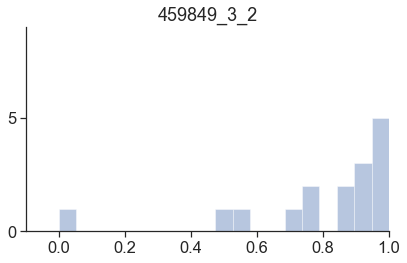

In [1614]:
plt.figure(figsize=(6,4))
k ='459849_3_2'
#for ijk,k in enumerate(['460175_None_2','456674_None_2','456675_None_2','456674_33_2','459849_None_2']):
    #plt.subplot(1,5,ijk+1)
plt.title(k)

mu_transs = [np.mean(i[-20:]) for i in allR_dict[k].values() if len(i)>0]
print(len(mu_transs))
#for k,v in allR_dict[k].items():
#    #print(k,)
#    if len(v)>0:
#        mu_transs.append(np.mean(v[-10:]))

#print(len(mu_transs))
seaborn.distplot(mu_transs,kde=0,bins=np.linspace(0,1,num=20))
if ijk==0:
    plt.ylabel("# of transitions")
    plt.xlabel("Fraction correct")
#plt.ylim(0,12)
plt.xlim(-.1,1)
plt.ylim(0,9)
plt.locator_params('y',nbins=3)
plt.tight_layout()
seaborn.despine()

In [1203]:
np.min(mu_transs)

0.0

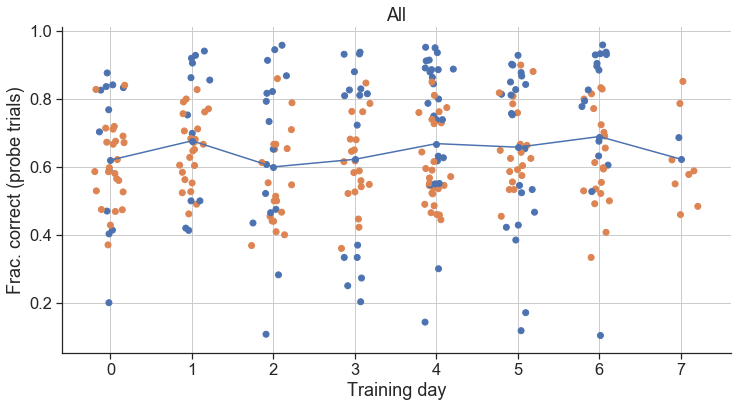

In [1678]:
plt.figure(figsize=(12,6))
plt.title("All")
plt.plot([np.nanmean([np.nanmean(i) for i in allRes[j]['pkA']]) for j in range(len(allRes))],marker='o')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkA2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkA']],c=np.array([clrs[0] if i=='loop' else clrs[1] for i in allRes[ctr]['graph_type']]))
plt.xlabel("Training day")
plt.ylabel("Frac. correct (probe trials)")
#plt.ylim(.02,1.)
plt.grid()
seaborn.despine()

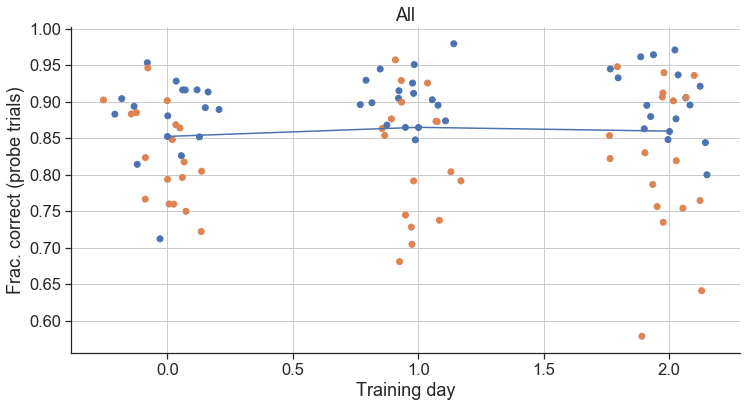

In [417]:
plt.figure(figsize=(12,6))
plt.title("All")
plt.plot([np.nanmean([np.nanmean(i) for i in allRes[j]['pkA']]) for j in range(len(allRes))],marker='o')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkA2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkA']],c=np.array([clrs[0] if i=='loop' else clrs[1] for i in allRes[ctr]['graph_type']]))
plt.xlabel("Training day")
plt.ylabel("Frac. correct (probe trials)")
#plt.ylim(.02,1.)
plt.grid()
seaborn.despine()

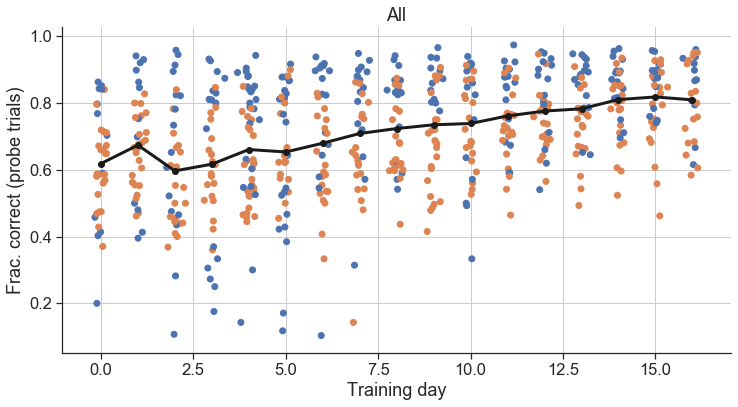

In [3586]:
plt.figure(figsize=(12,6))
plt.title("All")
plt.plot([np.nanmean([np.nanmean(i) for i in allRes[j]['pkA']]) for j in range(len(allRes))],
         marker='o',linewidth=3,color='k')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkA2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkA']],c=np.array([clrs[0] if i=='loop' else clrs[1] for i in allRes[ctr]['graph_type']]))
plt.xlabel("Training day")
plt.ylabel("Frac. correct (probe trials)")
#plt.ylim(.02,1.)
plt.grid()
seaborn.despine()

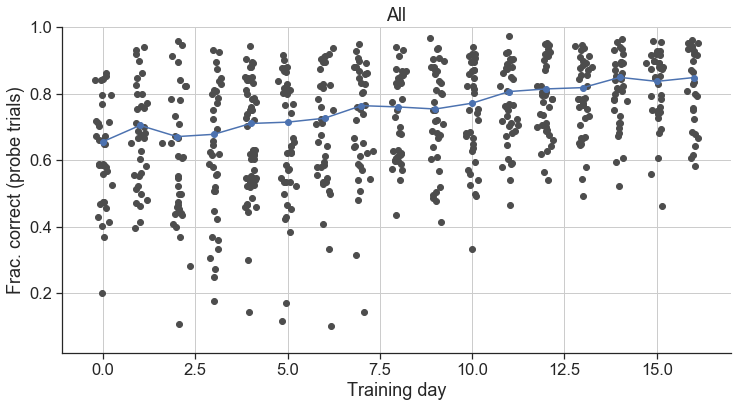

In [3585]:
plt.figure(figsize=(12,6))
plt.title("All")
plt.plot([np.mean(np.hstack(i['pkA'])) for i in allRes],marker='o')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkA2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkA']],color='.3')
plt.xlabel("Training day")
plt.ylabel("Frac. correct (probe trials)")
plt.ylim(.02,1.)
plt.grid()
seaborn.despine()

In [55]:
len([np.mean(i) for i in allRes[ctr]['pkNR2']])

18

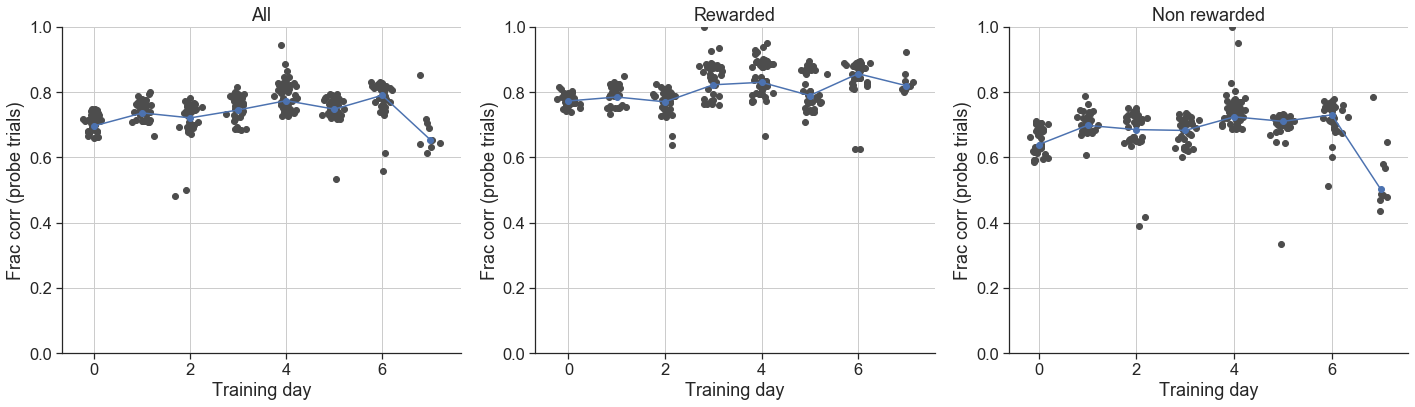

In [1679]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("All")
plt.plot([np.mean(np.hstack(i['pkA2'])) for i in allRes],marker='o')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkA2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkA2']],color='.3')
plt.xlabel("Training day")
plt.ylabel("Frac corr (probe trials)")
plt.ylim(0,1.)
plt.grid()


plt.subplot(1,3,2)
plt.title("Rewarded")
plt.plot([np.mean(np.hstack(i['pkR2'])) for i in allRes],marker='o')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkR2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkR2']],color='.3')
plt.xlabel("Training day")
plt.ylabel("Frac corr (probe trials)")
plt.ylim(0,1.)
plt.grid()


plt.subplot(1,3,3)
plt.title("Non rewarded")
plt.plot([np.mean(np.hstack(i['pkNR2'])) for i in allRes],marker='o')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkNR2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkNR2']],color='.3')
plt.xlabel("Training day")
plt.ylabel("Frac corr (probe trials)")
plt.ylim(0,1.)
plt.grid()

seaborn.despine()
plt.tight_layout()

In [73]:
len([np.mean(i) for i in allRes[ctr]['pkNR2']])

18

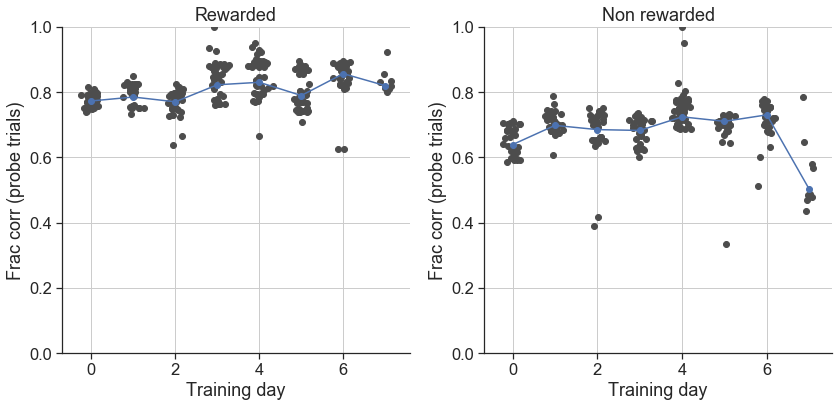

In [1680]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Rewarded")
plt.plot([np.mean(np.hstack(i['pkR2'])) for i in allRes],marker='o')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkR2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkR2']],color='.3')
plt.xlabel("Training day")
plt.ylabel("Frac corr (probe trials)")
plt.ylim(0,1.)
plt.grid()


plt.subplot(1,2,2)
plt.title("Non rewarded")
plt.plot([np.mean(np.hstack(i['pkNR2'])) for i in allRes],marker='o')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkNR2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkNR2']],color='.3')
plt.xlabel("Training day")
plt.ylabel("Frac corr (probe trials)")
plt.ylim(0,1.)
plt.grid()

seaborn.despine()
plt.tight_layout()

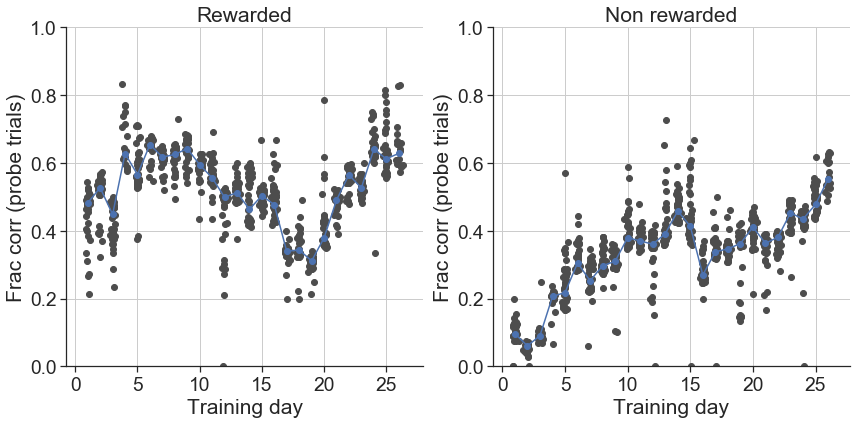

In [410]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Rewarded")
plt.plot([np.mean(np.hstack(i['pkR2'])) for i in allRes],marker='o')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkR2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkR2']],color='.3')
plt.xlabel("Training day")
plt.ylabel("Frac corr (probe trials)")
plt.ylim(0,1.)
plt.grid()


plt.subplot(1,2,2)
plt.title("Non rewarded")
plt.plot([np.mean(np.hstack(i['pkNR2'])) for i in allRes],marker='o')
for ctr in range(len(allRes)):
    n_ = len(allRes[ctr]['pkNR2'])
    plt.scatter(ctr*np.ones(n_)+np.random.normal(scale=.1,size=n_),
                [np.mean(i) for i in allRes[ctr]['pkNR2']],color='.3')
plt.xlabel("Training day")
plt.ylabel("Frac corr (probe trials)")
plt.ylim(0,1.)
plt.grid()

seaborn.despine()
plt.tight_layout()

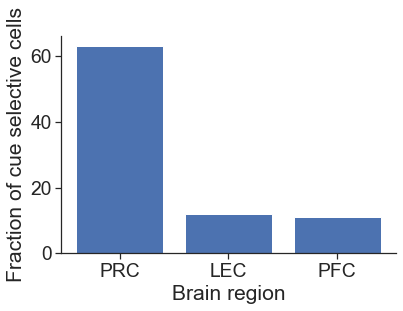

In [175]:
plt.bar(['PRC','LEC','PFC'],[63,12,11])
plt.ylabel("Fraction of cue selective cells")
plt.xlabel("Brain region")
seaborn.despine()

In [177]:
aa1 = np.random.poisson(lam=5,size=100)

In [187]:
aa2 = np.random.normal(size=100)

In [188]:
np.corrcoef(aa1,aa2)

array([[ 1.        , -0.10630941],
       [-0.10630941,  1.        ]])